## Automate Crypto Website API Scrapper Project

### Pulling the data 

In [13]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'ea710325-d826-4d1b-a937-3b2e8a112600',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-06-05T04:35:19.504Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 10028}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11098, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [14]:
type(data)

dict

In [83]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])

# Add the timestamp at the end column to identify when the data have been extracted
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11098,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.970786e+07,1.970786e+07,False,NaN,1,NaN,NaN,None,2024-06-05T04:34:00.000Z,71051.769396,3.586052e+10,14.9386,0.230497,2.617531,3.294373,11.228106,4.933576,7.450039,1.400278e+12,53.2368,1.492087e+12,None,2024-06-05T04:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 11:40:38.665652
1,1027,Ethereum,ETH,ethereum,9032,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201484e+08,1.201484e+08,True,NaN,2,NaN,NaN,None,2024-06-05T04:33:00.000Z,3806.836036,1.349221e+10,-5.1095,-0.043702,0.879152,-1.704026,21.626389,14.414206,0.254637,4.573851e+11,17.3892,4.573851e+11,None,2024-06-05T04:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 11:40:38.665652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,6636,Polkadot,DOT,polkadot-new,777,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.437953e+09,1.437953e+09,True,NaN,14,1.453371e+09,1.047654e+10,None,2024-06-05T04:34:00.000Z,7.208440,1.794829e+08,-9.5210,-0.207100,2.789952,-2.644916,-0.492305,-14.531330,-31.701913,1.036540e+10,0.3941,1.036540e+10,None,2024-06-05T04:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 11:40:38.665652
14,1958,TRON,TRX,tron,986,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.735018e+10,8.735020e+10,True,NaN,15,7.165966e+10,8.210445e+09,None,2024-06-05T04:33:00.000Z,0.114576,2.628688e+08,-2.5868,0.001993,1.135689,2.552962,-5.137610,-2.846225,-16.838547,1.000820e+10,0.3805,1.000820e+10,None,2024-06-05T04:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 11:40:38.665652


### Create a function to scrap the data

In [130]:
def api_runner():
    
    # Declare global variable
    global df
    
    
    
    # Pulling the data
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'ea710325-d826-4d1b-a937-3b2e8a112600',
    }

    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    
    # Create a csv and append data into it
    ## -Create a timestamps at the end column
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    ## -Create a csv file
    if not os.path.isfile(r'/Users/tranelys/Documents/Python Project/Crypto_API.csv'):
        df.to_csv(r'/Users/tranelys/Documents/Python Project/Crypto_API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/tranelys/Documents/Python Project/Crypto_API.csv', mode = 'a', header = False)
    
    df = pd.read_csv(r'/Users/tranelys/Documents/Python Project/Crypto_API.csv')
    
    # If you only want to keep data in a DataFrame and do not want to create a CSV file, use this script:
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)

In [115]:
df = pd.read_csv(r'/Users/tranelys/Documents/Python Project/Crypto_API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11098,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19707856.00000,19707856.00000,False,NaN,1,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,71147.76559,36941924542.41931,24.18460,0.32627,3.24248,3.98217,10.58970,4.45282,7.92608,1402169918966.01050,53.19260,1494103077386.31006,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
1,1,1027,Ethereum,ETH,ethereum,9032,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120148357.79078,120148357.79078,True,NaN,2,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,3815.21648,14384954277.15813,5.42230,0.76843,1.33421,-0.98452,19.91060,14.11702,1.08807,458391994761.71082,17.38060,458391994761.71002,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
2,2,825,Tether USDt,USDT,tether,87654,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112316773848.08260,115086550406.91910,True,NaN,3,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,0.99992,70722037416.02942,15.69630,-0.01588,0.01876,0.10067,-0.01514,-0.03022,-0.03385,112307689365.95808,4.25830,115077241897.83000,NaN,2024-06-05T07:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-05 14:05:46.705433
3,3,1839,BNB,BNB,bnb,2178,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147584972.30552,147584972.30552,False,NaN,4,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,708.74187,4201512254.97297,70.10270,0.47445,12.78871,17.80947,19.15132,21.63306,65.67623,104599649527.44038,3.96680,104599649527.44000,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
4,4,5426,Solana,SOL,solana,669,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,459803954.10174,577404940.53348,True,NaN,5,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,173.92531,2480936821.39049,23.39530,0.18541,5.02636,0.59306,16.72103,-2.21437,25.01297,79971544337.68875,3.03220,100425332124.17000,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
5,5,3408,USDC,USDC,usd-coin,19567,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32399922494.16909,32399922494.16909,False,NaN,6,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,0.99993,6425004616.17683,16.50960,-0.00550,-0.00561,-0.01354,-0.01262,0.00696,0.00803,32397494535.36999,1.22850,32397494535.37000,NaN,2024-06-05T07:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-05 14:05:46.705433
6,6,52,XRP,XRP,xrp,1336,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55450358947.00000,99987572899.00000,False,NaN,7,NaN,NaN,NaN,2024-06-05T07:04:00.000Z,0.52625,1253977329.84789,25.60100,0.24836,1.41165,-0.44384,-1.56670,-10.94835,-15.31441,29180888672.72885,1.10640,52625247567.14000,NaN,2024-06-05T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
7,7,74,Dogecoin,DOGE,dogecoin,978,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144579476383.70520,144579476383.70520,True,NaN,8,NaN,NaN,NaN,2024-06-05T07:04:00.000Z,0.16438,825444325.39167,-6.57970,1.09321,4.02364,-2.22138,0.28599,-10.68710,9.99966,23765775870.73318,0.90130,23765775870.73000,NaN,2024-06-05T07:04:00.000Z,N

### Create timer to run function

In [131]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print ('API Runner completed')
    sleep(60) # sleep for 1 minute
    
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [133]:
pd.read_csv('/Users/tranelys/Documents/Python Project/Crypto_API.csv')

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11098,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19707856.00000,19707856.00000,False,NaN,1,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,71147.76559,36941924542.41931,24.18460,0.32627,3.24248,3.98217,10.58970,4.45282,7.92608,1402169918966.01050,53.19260,1494103077386.31006,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
1,1,1027,Ethereum,ETH,ethereum,9032,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120148357.79078,120148357.79078,True,NaN,2,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,3815.21648,14384954277.15813,5.42230,0.76843,1.33421,-0.98452,19.91060,14.11702,1.08807,458391994761.71082,17.38060,458391994761.71002,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
2,2,825,Tether USDt,USDT,tether,87654,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112316773848.08260,115086550406.91910,True,NaN,3,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,0.99992,70722037416.02942,15.69630,-0.01588,0.01876,0.10067,-0.01514,-0.03022,-0.03385,112307689365.95808,4.25830,115077241897.83000,NaN,2024-06-05T07:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-05 14:05:46.705433
3,3,1839,BNB,BNB,bnb,2178,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147584972.30552,147584972.30552,False,NaN,4,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,708.74187,4201512254.97297,70.10270,0.47445,12.78871,17.80947,19.15132,21.63306,65.67623,104599649527.44038,3.96680,104599649527.44000,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
4,4,5426,Solana,SOL,solana,669,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,459803954.10174,577404940.53348,True,NaN,5,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,173.92531,2480936821.39049,23.39530,0.18541,5.02636,0.59306,16.72103,-2.21437,25.01297,79971544337.68875,3.03220,100425332124.17000,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
5,5,3408,USDC,USDC,usd-coin,19567,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32399922494.16909,32399922494.16909,False,NaN,6,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,0.99993,6425004616.17683,16.50960,-0.00550,-0.00561,-0.01354,-0.01262,0.00696,0.00803,32397494535.36999,1.22850,32397494535.37000,NaN,2024-06-05T07:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-05 14:05:46.705433
6,6,52,XRP,XRP,xrp,1336,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55450358947.00000,99987572899.00000,False,NaN,7,NaN,NaN,NaN,2024-06-05T07:04:00.000Z,0.52625,1253977329.84789,25.60100,0.24836,1.41165,-0.44384,-1.56670,-10.94835,-15.31441,29180888672.72885,1.10640,52625247567.14000,NaN,2024-06-05T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
7,7,74,Dogecoin,DOGE,dogecoin,978,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144579476383.70520,144579476383.70520,True,NaN,8,NaN,NaN,NaN,2024-06-05T07:04:00.000Z,0.16438,825444325.39167,-6.57970,1.09321,4.02364,-2.22138,0.28599,-10.68710,9.99966,23765775870.73318,0.90130,23765775870.73000,NaN,2024-06-05T07:04:00.000Z,N

### Transforming the data

In [134]:
# Convert the from the scientific value to float

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [135]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11098,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19707856.00000,19707856.00000,False,NaN,1,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,71147.76559,36941924542.41931,24.18460,0.32627,3.24248,3.98217,10.58970,4.45282,7.92608,1402169918966.01050,53.19260,1494103077386.31006,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
1,1,1027,Ethereum,ETH,ethereum,9032,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120148357.79078,120148357.79078,True,NaN,2,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,3815.21648,14384954277.15813,5.42230,0.76843,1.33421,-0.98452,19.91060,14.11702,1.08807,458391994761.71082,17.38060,458391994761.71002,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
2,2,825,Tether USDt,USDT,tether,87654,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112316773848.08260,115086550406.91910,True,NaN,3,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,0.99992,70722037416.02942,15.69630,-0.01588,0.01876,0.10067,-0.01514,-0.03022,-0.03385,112307689365.95808,4.25830,115077241897.83000,NaN,2024-06-05T07:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-05 14:05:46.705433
3,3,1839,BNB,BNB,bnb,2178,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147584972.30552,147584972.30552,False,NaN,4,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,708.74187,4201512254.97297,70.10270,0.47445,12.78871,17.80947,19.15132,21.63306,65.67623,104599649527.44038,3.96680,104599649527.44000,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
4,4,5426,Solana,SOL,solana,669,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,459803954.10174,577404940.53348,True,NaN,5,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,173.92531,2480936821.39049,23.39530,0.18541,5.02636,0.59306,16.72103,-2.21437,25.01297,79971544337.68875,3.03220,100425332124.17000,NaN,2024-06-05T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
5,5,3408,USDC,USDC,usd-coin,19567,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32399922494.16909,32399922494.16909,False,NaN,6,NaN,NaN,NaN,2024-06-05T07:03:00.000Z,0.99993,6425004616.17683,16.50960,-0.00550,-0.00561,-0.01354,-0.01262,0.00696,0.00803,32397494535.36999,1.22850,32397494535.37000,NaN,2024-06-05T07:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-05 14:05:46.705433
6,6,52,XRP,XRP,xrp,1336,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55450358947.00000,99987572899.00000,False,NaN,7,NaN,NaN,NaN,2024-06-05T07:04:00.000Z,0.52625,1253977329.84789,25.60100,0.24836,1.41165,-0.44384,-1.56670,-10.94835,-15.31441,29180888672.72885,1.10640,52625247567.14000,NaN,2024-06-05T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-05 14:05:46.705433
7,7,74,Dogecoin,DOGE,dogecoin,978,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144579476383.70520,144579476383.70520,True,NaN,8,NaN,NaN,NaN,2024-06-05T07:04:00.000Z,0.16438,825444325.39167,-6.57970,1.09321,4.02364,-2.22138,0.28599,-10.68710,9.99966,23765775870.73318,0.90130,23765775870.73000,NaN,2024-06-05T07:04:00.000Z,N

In [136]:
df_group = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean(numeric_only = True)
df_group

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.13375,1.98810,4.16713,10.58926,4.40422,6.30297
Ethereum,-0.17594,0.72484,-0.27812,21.15849,14.28125,0.08357
Tether USDt,0.00461,0.01636,0.08659,-0.00895,-0.02626,-0.03310
BNB,-0.13967,9.20932,17.12858,18.52888,20.53866,59.67948
Solana,-0.15840,4.15812,1.78469,13.69876,-1.34279,21.07347
USDC,0.00607,-0.00713,0.00319,0.00624,0.01591,0.02427
XRP,-0.04238,0.43468,-0.43176,-1.14140,-10.47780,-15.33473
Dogecoin,0.29906,2.52764,-1.83413,1.21406,-10.35034,7.73927
Toncoin,-0.13247,6.30183,12.36612,22.09897,35.97544,169.49920


In [137]:
# Stacking the data

df_stack = df_group.stack()
df_stack

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.13375
             quote.USD.percent_change_24h     1.98810
             quote.USD.percent_change_7d      4.16713
             quote.USD.percent_change_30d    10.58926
             quote.USD.percent_change_60d     4.40422
             quote.USD.percent_change_90d     6.30297
Ethereum     quote.USD.percent_change_1h     -0.17594
             quote.USD.percent_change_24h     0.72484
             quote.USD.percent_change_7d     -0.27812
             quote.USD.percent_change_30d    21.15849
             quote.USD.percent_change_60d    14.28125
             quote.USD.percent_change_90d     0.08357
Tether USDt  quote.USD.percent_change_1h      0.00461
             quote.USD.percent_change_24h     0.01636
             quote.USD.percent_change_7d      0.08659
             quote.USD.percent_change_30d    -0.00895
             quote.USD.percent_change_60d    -0.02626
             quote.USD.percent_change_90

In [138]:
type(df_stack)

pandas.core.series.Series

In [139]:
# Convert 'df_stack' from Series to Dataframe

df_df = df_stack.to_frame(name = 'value')
df_df

value
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.13375
            quote.USD.percent_change_24h   1.98810
            quote.USD.percent_change_7d    4.16713
            quote.USD.percent_change_30d  10.58926
            quote.USD.percent_change_60d   4.40422
            quote.USD.percent_change_90d   6.30297
Ethereum    quote.USD.percent_change_1h   -0.17594
            quote.USD.percent_change_24h   0.72484
            quote.USD.percent_change_7d   -0.27812
            quote.USD.percent_change_30d  21.15849
            quote.USD.percent_change_60d  14.28125
            quote.USD.percent_change_90d   0.08357
Tether USDt quote.USD.percent_change_1h    0.00461
            quote.USD.percent_change_24h   0.01636
            quote.USD.percent_change_7d    0.08659
            quote.USD.percent_change_30d  -0.00895
            quote.USD.percent_change_60d  -0.02626
            quote.USD.percent_change_90d  -0.03310
BNB         quote.USD.percent_change_1h   -0.13967
            quote.USD.percent_change_24h   9.20932
            quote.USD.percent_change_7d   17.12858
            quote.USD.percent_change_30d  18.52888
            quote.USD.percent_change_60d  20.53866
            quote.USD.percent_change_90d  59.67948
Solana      quote.USD.percent_change_1h   -0.15840
            quote.USD.percent_change_24h   4.15812
            quote.USD.percent_change_7d    1.78469
            quote.USD.percent_change_30d  13.69876
            quote.USD.percent_change_60d  -1.34279
            quote.USD.percent_change_90d  21.07347
USDC        quote.USD.percent_change_1h    0.00607
            quote.USD.percent_change_24h  -0.00713
            quote.USD.percent_change_7d    0.00319
            quote.USD.percent_change_30d   0.00624
            quote.USD.percent_change_60d   0.01591
            quote.USD.percent_change_90d   0.02427
XRP         quote.USD.percent_change_1h   -0.04238
            quote.USD.percent_change_24h   0.43468
            quote.USD.percent_change_7d   -0.43176
            quote.USD.percent_change_30d  -1.14140
            quote.USD.percent_change_60d -10.47780
            quote.USD.percent_change_90d -15.33473
Dogecoin    quote.USD.percent_change_1h    0.29906
            quote.USD.percent_change_24h   2.52764
            quote.USD.percent_change_7d   -1.83413
            quote.USD.percent_change_30d   1.21406
            quote.USD.percent_change_60d -10.35034
            quote.USD.percent_change_90d   7.73927
Toncoin     quote.USD.percent_change_1h   -0.13247
            quote.USD.percent_change_24h   6.30183
            quote.USD.percent_change_7d   12.36612
            quote.USD.percent_change_30d  22.09897
            quote.USD.percent_change_60d  35.97544
            quote.USD.percent_change_90d 169.49920
Cardano     quote.USD.percent_change_1h    0.03605
            quote.USD.percent_change_24h   0.70845
            quote.USD.percent_change_7d   -0.01309
            quote.USD.percent_change_30d  -0.43820
            quote.USD.percent_change_60d -20.60340
            quote.USD.percent_change_90d -37.19078
Shiba Inu   quote.USD.percent_change_1h    0.50655
            quote.USD.percent_change_24h   7.45648
            quote.USD.percent_change_7d   -6.64882
            quote.USD.percent_change_30d   4.69514
            quote.USD.percent_change_60d  -5.09622
            quote.USD.percent_change_90d -16.63209
Avalanche   quote.USD.percent_change_1h   -0.00659
            quote.USD.percent_change_24h   3.91086
            quote.USD.percent_change_7d   -1.89067
            quote.USD.percent_change_30d  -4.48655
            quote.USD.percent_change_60d -22.56262
            quote.USD.percent_change_90d -15.85867
Chainlink   quote.USD.percent_change_1h   -0.19487
            quote.USD.percent_change_24h   0.61980
            quote.USD.percent_change_7d   -5.23700
            quote.USD.percent_change_30d  20.41251
            quote.USD.percent_change_60d   2.13417
            quot

In [140]:
type(df_df)

pandas.core.frame.DataFrame

In [141]:
df_df.count()

value    90
dtype: int64

In [142]:
# The issue of dataframe 'df_df' is 

index = pd.Index(range(90)) #Create a range from 0 to 89

df_index = df_df.set_index(index) #Use the range above to set index for the dataframe
df_index

,value
0,-0.13375
1,1.98810
2,4.16713
3,10.58926
4,4.40422
5,6.30297
6,-0.17594
7,0.72484
8,-0.27812
9,21.15849


In [143]:
# Reset the index

df_indexed = df_df.reset_index()
df_indexed

,name,level_1,value
0,Bitcoin,quote.USD.percent_change_1h,-0.13375
1,Bitcoin,quote.USD.percent_change_24h,1.98810
2,Bitcoin,quote.USD.percent_change_7d,4.16713
3,Bitcoin,quote.USD.percent_change_30d,10.58926
4,Bitcoin,quote.USD.percent_change_60d,4.40422
5,Bitcoin,quote.USD.percent_change_90d,6.30297
6,Ethereum,quote.USD.percent_change_1h,-0.17594
7,Ethereum,quote.USD.percent_change_24h,0.72484
8,Ethereum,quote.USD.percent_change_7d,-0.27812
9,Ethereum,quote.USD.percent_change_30d,21.15849


In [144]:
# Change the column name

df_3 = df_indexed.rename(columns = {'level_1': 'percent change'})

# Change the content in the column 'percent change'

df_3['percent change'] = df_3['percent change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df_3

,name,percent change,value
0,Bitcoin,1h,-0.13375
1,Bitcoin,24h,1.98810
2,Bitcoin,7d,4.16713
3,Bitcoin,30d,10.58926
4,Bitcoin,60d,4.40422
5,Bitcoin,90d,6.30297
6,Ethereum,1h,-0.17594
7,Ethereum,24h,0.72484
8,Ethereum,7d,-0.27812
9,Ethereum,30d,21.15849


### Visualizing the data

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

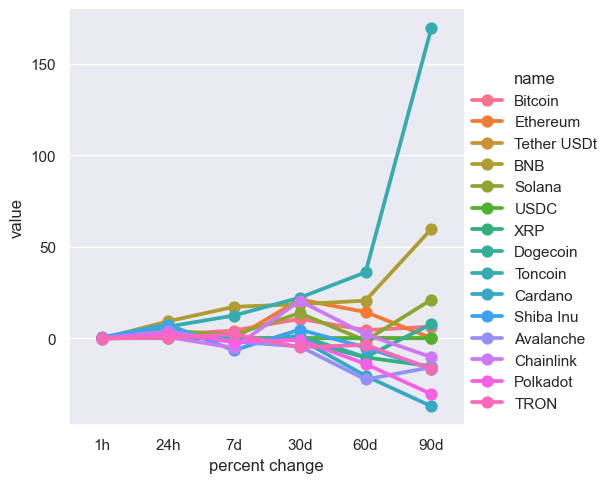

In [145]:
sns.catplot(x = 'percent change', y = 'value', hue = 'name', data = df_3, kind = 'point')

In [146]:
df_bitcoin = df[['name', 'quote.USD.price', 'timestamp']]
df_bitcoin = df_bitcoin.query("name == 'Bitcoin'")
df_bitcoin

,name,quote.USD.price,timestamp
0,Bitcoin,71147.76559,2024-06-05 14:05:46.705433
15,Bitcoin,71161.23677,2024-06-05 14:06:50.808333
30,Bitcoin,71161.23677,2024-06-05 14:07:51.758698
45,Bitcoin,70671.55446,2024-06-05 20:58:53.930297
60,Bitcoin,70765.97835,2024-06-05 20:59:54.942182
75,Bitcoin,70735.06682,2024-06-05 21:00:55.451059
90,Bitcoin,70626.82511,2024-06-05 21:01:56.384522
105,Bitcoin,70619.56070,2024-06-05 21:02:57.317055
120,Bitcoin,70720.35019,2024-06-05 21:03:58.338256


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

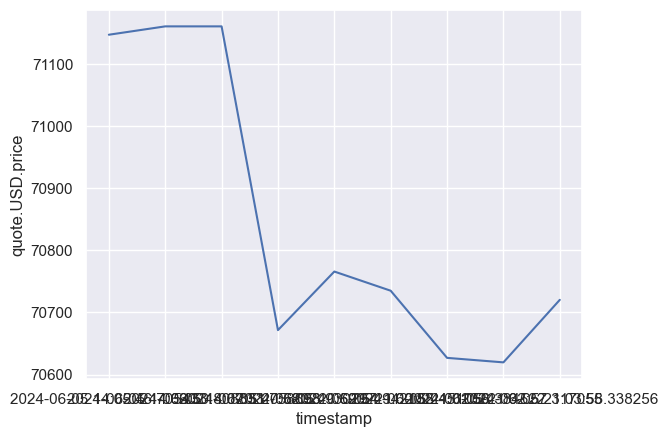

In [147]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df_bitcoin)